In [77]:
import numpy as np
import pandas as pd

In [78]:
iris = pd.read_csv('iris.csv')
iris = iris.drop('Id', axis=1)

In [79]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
X = iris.drop('Species', axis=1)
y = iris['Species']

In [81]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [82]:
encoder = LabelBinarizer()

In [83]:
y = encoder.fit_transform(y)
print(y[:10])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [85]:
scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler()

In [86]:
scaler_X_train = scaler.transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [88]:
model = Sequential()
model.add(Dense(4, input_shape=[4,], activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

d:\Users\Higor\Documents\Anomalias_de_Codigo\tensor-keras-curso\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
early_stop = EarlyStopping(patience=10)

In [90]:
model.fit(scaler_X_train, y_train, epochs=500, validation_data=(scaler_X_test, y_test), callbacks=[early_stop])

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3075 - loss: 1.1385 - val_accuracy: 0.3000 - val_loss: 1.1255
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3460 - loss: 1.1298 - val_accuracy: 0.3000 - val_loss: 1.1232
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3096 - loss: 1.1288 - val_accuracy: 0.3000 - val_loss: 1.1205
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3669 - loss: 1.1165 - val_accuracy: 0.3000 - val_loss: 1.1181
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3512 - loss: 1.1174 - val_accuracy: 0.3000 - val_loss: 1.1155
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3212 - loss: 1.1210 - val_accuracy: 0.3000 - val_loss: 1.1130
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3233 - loss: 1.1187 - val_accuracy: 0.2667 - val_loss: 1.1106
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3723 - loss: 1.1067 - val_accuracy: 0.2667 - val_loss:

<Axes: >

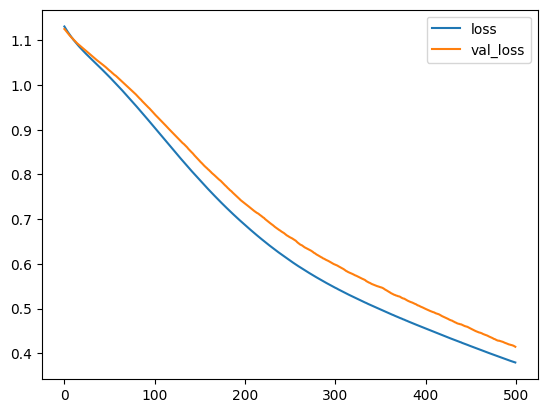

In [91]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

<Axes: >

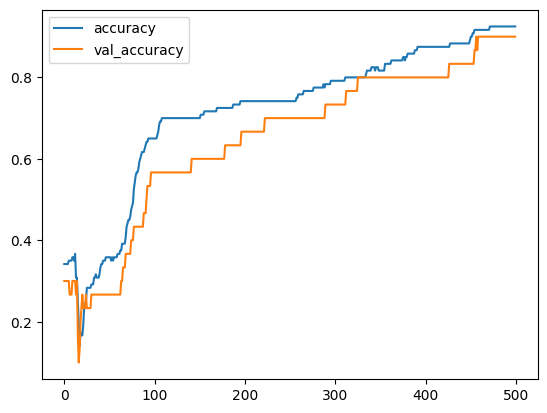

In [92]:
metrics[['accuracy', 'val_accuracy']].plot()

In [93]:
model.evaluate(scaler_X_test, y_test, verbose=0)

[0.4143996238708496, 0.8999999761581421]

In [94]:
epochs = len(metrics)
epochs

500

In [95]:
scaled_X = scaler.fit_transform(X)

In [96]:
model = Sequential()
model.add(Dense(4, input_shape=[4,], activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

d:\Users\Higor\Documents\Anomalias_de_Codigo\tensor-keras-curso\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

In [97]:
model.fit(scaled_X, y, epochs=epochs)

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3134 - loss: 1.1205  
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3099 - loss: 1.1158 
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3155 - loss: 1.1079 
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3372 - loss: 1.1040 
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3408 - loss: 1.1025 
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4475 - loss: 1.0957 
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4284 - loss: 1.0965 
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5355 - loss: 1.0975 
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6374 - loss: 1.0922 
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6857 - loss: 1.0846 
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6730 - loss: 1.0839 
Epoch 12/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6604 - lo

In [98]:
model.save('iris_model.h5')

In [99]:
import joblib

In [100]:
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [101]:
from tensorflow.keras.models import load_model

In [102]:
flower_model = load_model('iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')

In [103]:
iris.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [104]:
flower_example = {'SepalLengthCm': 5.1, 
                  'SepalWidthCm': 3.5, 
                  'PetalLengthCm': 1.4, 
                  'PetalWidthCm': 0.2}


In [ ]:
def return_prediction(model, scaler, sample_json):
    
    classes = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    
    s_len = sample_json['SepalLengthCm']
    s_wid = sample_json['SepalWidthCm']
    p_len = sample_json['PetalLengthCm']
    p_wid = sample_json['PetalWidthCm']
    
    flower = [[s_len, s_wid, p_len, p_wid]]
    
    flower = scaler.transform(flower)
    
    class_ind = model.predict(flower)
    class_x_ind = np.argmax(class_ind, axis=1)
    
    return classes[class_x_ind][0]

In [112]:
return_prediction(flower_model, flower_scaler, flower_example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


d:\Users\Higor\Documents\Anomalias_de_Codigo\tensor-keras-curso\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.str_('Iris-setosa')

In [113]:
# For deployment
from tensorflow.keras.models import load_model
import numpy as np
import joblib

flower_model = load_model('iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')

def return_prediction(model, scaler, sample_json):
    
    classes = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    
    s_len = sample_json['SepalLengthCm']
    s_wid = sample_json['SepalWidthCm']
    p_len = sample_json['PetalLengthCm']
    p_wid = sample_json['PetalWidthCm']
    
    flower = [[s_len, s_wid, p_len, p_wid]]
    
    flower = scaler.transform(flower)
    
    class_ind = model.predict(flower)
    class_x_ind = np.argmax(class_ind, axis=1)
    
    return classes[class_x_ind][0]